In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

class ChangePointSequence:
    def __init__(self, N, mean, standard_deviation, change_point_position):
        self.N = N - 1
        self.counter = -1
        self.mean = mean
        self.standard_deviation = standard_deviation
        self.change_point_position = change_point_position
        self.sequence = []
        
    def __iter__(self):
        return self
    
    def __next__(self):
        pass

    
class NoChangePoint(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности без разладки.
    '''
    def __init__(self, N, mean, standard_deviation):
        super().__init__(N, mean, standard_deviation, 0)
        
    def __next__(self):
        if self.counter < self.N:
            self.counter += 1
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1))             
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        else:
            raise StopIteration
    

class ChagePointMean(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в М.О.
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, mean_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.mean_change = mean_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=(self.mean+self.mean_change), scale=self.standard_deviation, size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        
        else:
            raise StopIteration
            
            
class ChagePointMeanDynamic(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в М.О.
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, mean_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.mean_change = mean_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=(self.mean+self.mean_change*(self.counter-self.change_point_position)),
                                scale=self.standard_deviation,
                                size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
            
        else:
            raise StopIteration
            
            
class ChagePointDispersion(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в дисперсии
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, standard_deviation_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.standard_deviation_change = standard_deviation_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.dispersion, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=self.mean, scale=(self.standard_deviation+self.standard_deviation_change), size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        
        else:
            raise StopIteration    

# Модель со скачкообразным изменением математического ожидания

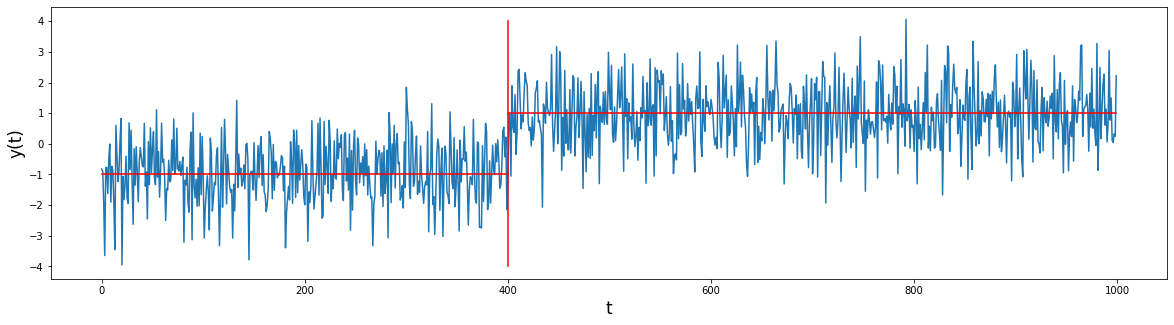

In [5]:
sequence = ChagePointMean(N=1000, mean=-1, standard_deviation=1, change_point_position=400, mean_change=2)

for i in sequence:
    pass

plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(sequence.N+1), sequence.sequence)

plt.plot(
    [0, sequence.change_point_position], 
    [sequence.mean, sequence.mean],'r')

plt.plot(
    [sequence.change_point_position, sequence.N],
    [sequence.mean+sequence.mean_change, sequence.mean+sequence.mean_change], 'r')

plt.plot(
    [sequence.change_point_position, sequence.change_point_position],
    [sequence.mean - 3, sequence.mean+sequence.mean_change+3], color='r')   

plt.show()

# Модель с динамическим изменением математического ожидания

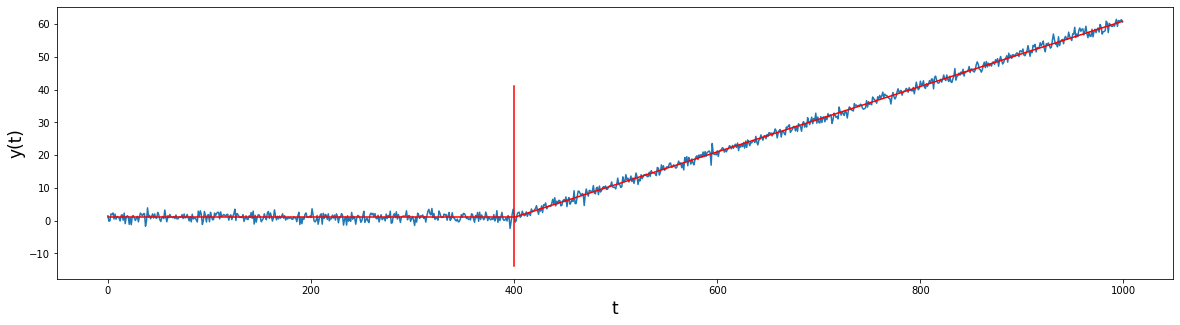

In [67]:
sequence = ChagePointMeanDynamic(N=1000, mean=1, standard_deviation=1, change_point_position=400, mean_change=0.1)

for i in sequence:
    pass

plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(sequence.N+1), sequence.sequence)

plt.plot(
     [0, sequence.change_point_position], 
     [sequence.mean, sequence.mean],'r')

x = [sequence.change_point_position, sequence.N]
y = [sequence.mean+sequence.mean_change*(x_t-sequence.change_point_position) for x_t in x]
plt.plot(x, y, 'r')


plt.plot(
    [sequence.change_point_position, sequence.change_point_position],
    [sequence.mean - 15, sequence.mean+sequence.mean_change+40], color='r')   


plt.show()

# Модель с изменением дисперсии

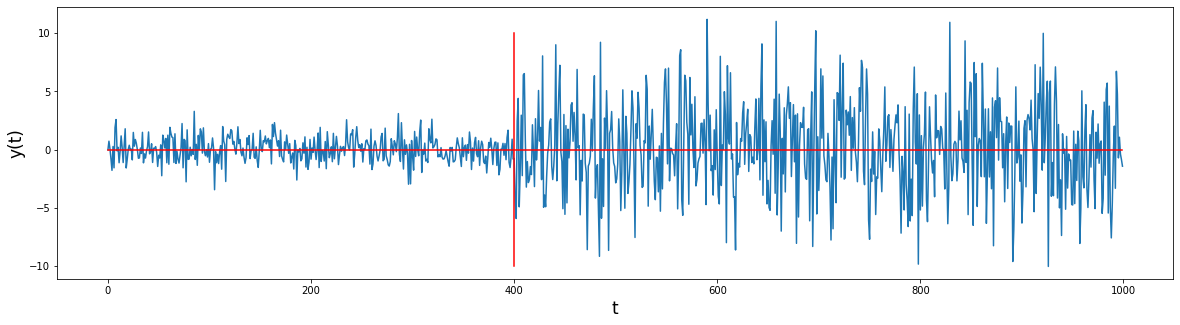

In [9]:
sequence = ChagePointDispersion(N=1000, mean=0, standard_deviation=1, change_point_position=400, standard_deviation_change=3)

for i in sequence:
    pass

plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(sequence.N+1), sequence.sequence)

plt.plot(
    [0, sequence.N], 
    [sequence.mean, sequence.mean],'r')

plt.plot(
    [sequence.change_point_position, sequence.change_point_position],
    [sequence.mean - 10, sequence.mean + 10], color='r')  

plt.show()

# Модель без разладки

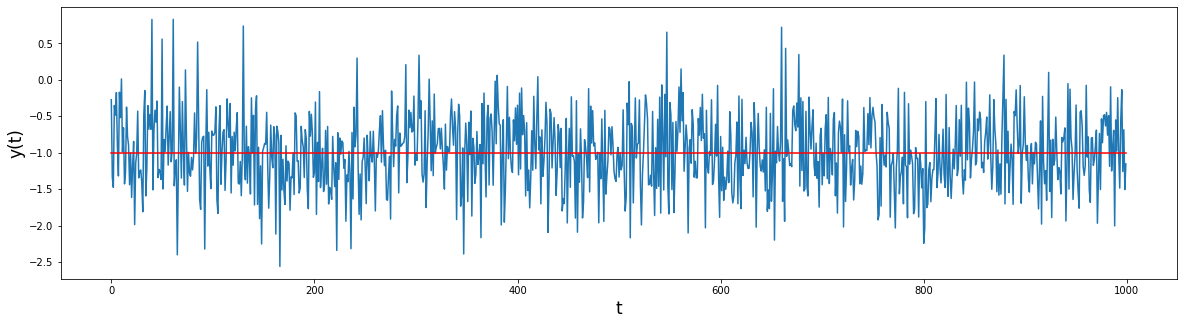

In [14]:
sequence = NoChangePoint(N=1000, mean=-1, standard_deviation=0.5)

for i in sequence:
    pass

plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(sequence.N+1), sequence.sequence)

plt.plot(
    [0, sequence.N], 
    [sequence.mean, sequence.mean],'r')

plt.show()

# Черновики

7.515974520328324


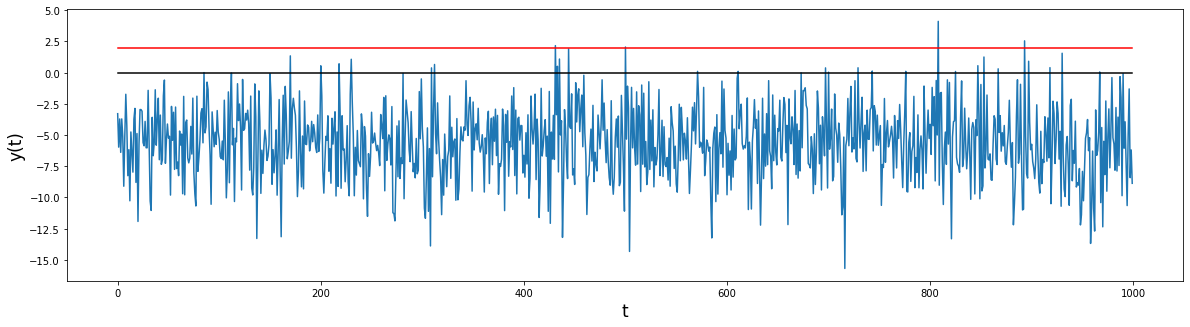

In [51]:
sequence = NoChangePoint(N=1000, mean=2, standard_deviation=3)

for i in sequence:
    pass

from numpy import mean, std
m = mean(sequence.sequence[:200])
s = np.std(sequence.sequence[:200])
v = (abs(m) + 2*s) 
print(m + 2*s)
seq = [x - v for x in sequence.sequence]

plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(sequence.N+1), seq)

plt.plot(
    [0, sequence.N], 
    [sequence.mean, sequence.mean],'r')

plt.plot(
    [0, sequence.N], 
    [0, 0],'black')

plt.show()

3.1082910707343796


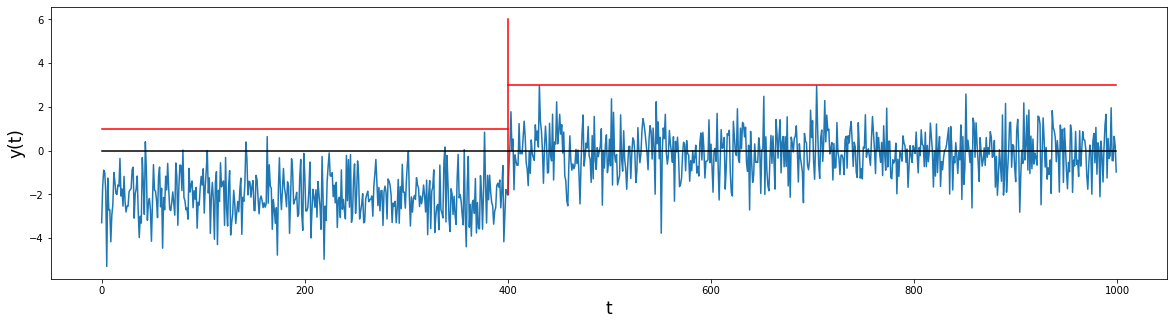

In [66]:
sequence = ChagePointMean(N=1000, mean=1, standard_deviation=1, change_point_position=400, mean_change=2)

for i in sequence:
    pass


from numpy import mean, std
m = mean(sequence.sequence[:200])
s = np.std(sequence.sequence[:200])
v = (abs(m) + 2*s) 
print(m + 2*s)
seq = [x - v for x in sequence.sequence]

plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(sequence.N+1), seq)

plt.plot(
    [0, sequence.change_point_position], 
    [sequence.mean, sequence.mean],'r')

plt.plot(
    [sequence.change_point_position, sequence.N],
    [sequence.mean+sequence.mean_change, sequence.mean+sequence.mean_change], 'r')

plt.plot(
    [sequence.change_point_position, sequence.change_point_position],
    [sequence.mean - 3, sequence.mean+sequence.mean_change+3], color='r') 

plt.plot(
    [0, sequence.N], 
    [0, 0],'black')

plt.show()

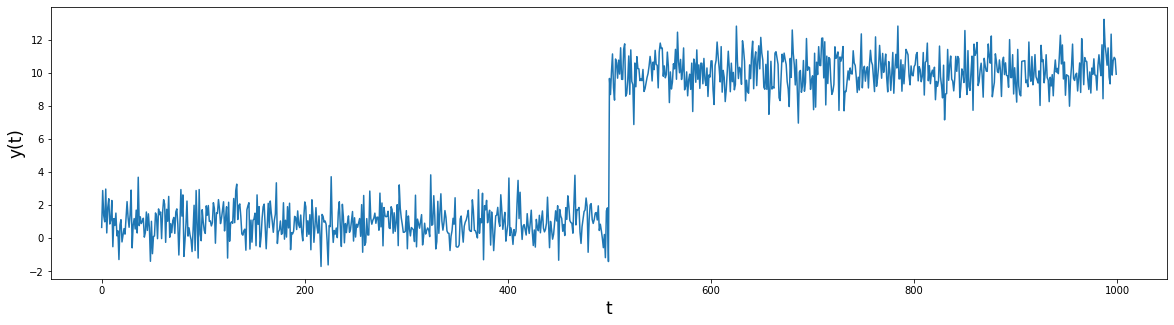

In [30]:
a = norm.rvs(loc=1, scale=1, size=500)
b = norm.rvs(loc=10, scale=1, size=500)
e = np.concatenate([a,b])


plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(range(N), e)



plt.show()